In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/dailyActivity_merged.csv')

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [8]:
data._get_numeric_data

<bound method NDFrame._get_numeric_data of              Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162       8.500000         8.500000   
1    1503960366    4/13/2016       10735       6.970000         6.970000   
2    1503960366    4/14/2016       10460       6.740000         6.740000   
3    1503960366    4/15/2016        9762       6.280000         6.280000   
4    1503960366    4/16/2016       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2016       10686       8.110000         8.110000   
936  8877689391     5/9/2016       20226      18.250000        18.250000   
937  8877689391    5/10/2016       10733       8.150000         8.150000   
938  8877689391    5/11/2016       21420      19.559999        19.559999   
939  8877689391    5/12/2016        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDis

In [9]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [10]:
fig = px.scatter(data, x = 'TotalSteps', y = 'Calories', size = 'Calories', color = 'Calories', trendline = 'ols')
fig.update_layout(width=1000, height=600)
fig.show()

In [11]:
fig = px.scatter(data, x = 'Calories', y = 'TotalDistance', size = 'Calories', color = 'Calories', trendline = 'ols')
fig.update_layout(width=1000, height=600)
fig.show()

In [12]:
fig = px.scatter(data, x = 'SedentaryMinutes', y = 'Calories', size = 'Calories', color = 'Calories', trendline = 'ols')
fig.update_layout(width=1000, height=600)
fig.show()

In [13]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()

fig = go.Figure(data=[go.Pie(labels= label, values=counts)])
fig.update_traces(hoverinfo='value+label', textfont_size=30,
                  marker=dict(line=dict(color='black', width=2)))
fig.update_layout(width=1000, height=600)
fig.show()

In [14]:
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], format="%m/%d/%Y")
data['Day'] = data['ActivityDate'].dt.day_name()
data.Day.head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object

Text(0.5, 8.960000000000022, 'Day of the Week')

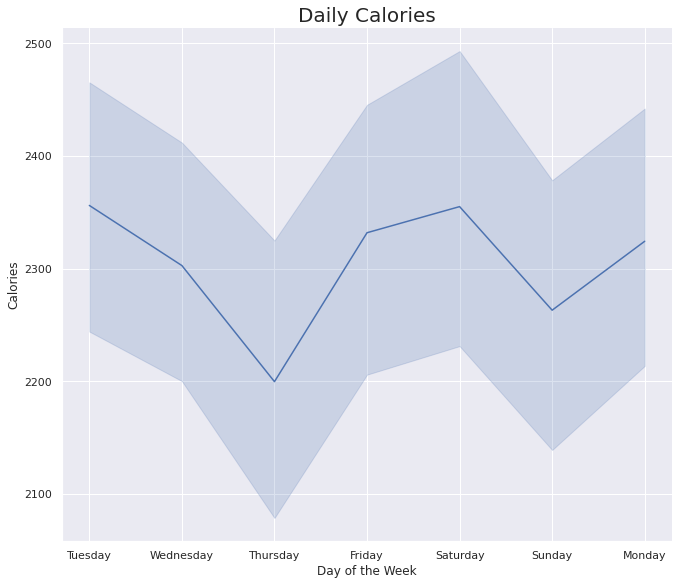

In [15]:
sns.set_theme()
sns.relplot(data=data, kind = 'line', x = 'Day', y= 'Calories', height = 8, aspect = 1.2)
plt.title('Daily Calories', fontsize = 20)
plt.xlabel('Day of the Week')

Text(0.5, 8.960000000000022, 'Day of the Week')

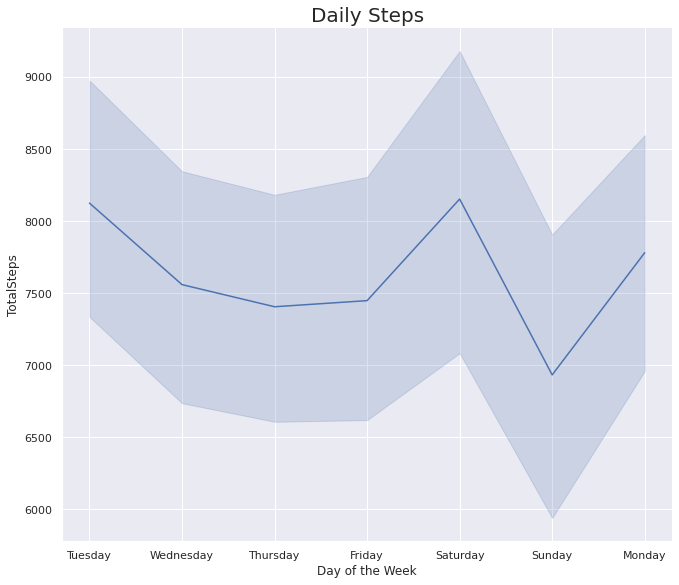

In [16]:
sns.set_theme()
sns.relplot(data=data, kind = 'line', x = 'Day', y= 'TotalSteps', height = 8, aspect = 1.2)
plt.title('Daily Steps', fontsize = 20)
plt.xlabel('Day of the Week')

Text(0.5, 8.960000000000022, 'Day of the Week')

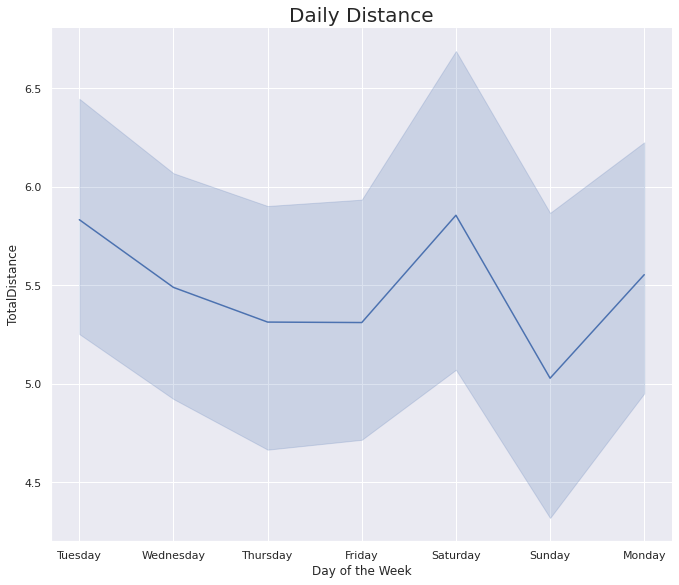

In [17]:
sns.set_theme()
sns.relplot(data=data, kind = 'line', x = 'Day', y= 'TotalDistance', height = 8, aspect = 1.2)
plt.title('Daily Distance', fontsize = 20)
plt.xlabel('Day of the Week')

Text(0.5, 1.0, 'Total Steps by Day')

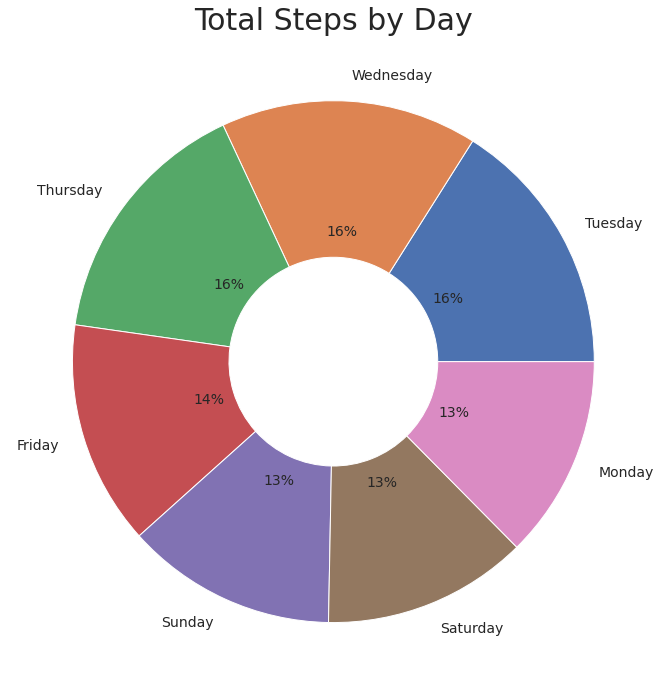

In [18]:
data.groupby("TotalSteps").first()["Day"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(18,12),wedgeprops=dict(width=0.6),pctdistance=0.5, fontsize=14)
plt.ylabel(None)
plt.title('Total Steps by Day', fontsize = 30)

In [19]:
daily_calories = data["Day"].value_counts()
label = daily_calories.index
counts = data["Calories"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned by Weekday', font_size= 20)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(line=dict(color='black', width=3)))
fig.update_layout(width = 800, height = 500)
fig.show()

In [20]:
daily_activemins = data["Day"].value_counts()
label = daily_activemins.index
counts = data["VeryActiveMinutes"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Very Active Mins by Weekday', font_size= 20)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(line=dict(color='black', width=3)))
fig.update_layout(width = 800, height = 500)
fig.show()

In [21]:
daily_lightmins = data["Day"].value_counts()
label = daily_lightmins.index
counts = data["LightlyActiveMinutes"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Light Mins by Weekday', font_size= 20)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(line=dict(color='black', width=3)))
fig.update_layout(width = 800, height = 500)
fig.show()